In [1]:
from mplsoccer.pitch import Pitch
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('input/jugadores_20.csv')

In [5]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [6]:
data.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [7]:
data.dtypes

sofifa_id      int64
player_url    object
short_name    object
long_name     object
age            int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 104, dtype: object

In [8]:
# Jugadores mas valiosos

In [9]:
data.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [10]:
data[["value_eur", "short_name", "nationality", "club", "age"]].sort_values(by="value_eur", ascending=False).head()

,value_eur,short_name,nationality,club,age
2,105500000,Neymar Jr,Brazil,Paris Saint-Germain,27
0,95500000,L. Messi,Argentina,FC Barcelona,32
10,93500000,K. Mbappé,France,Paris Saint-Germain,20
5,90000000,K. De Bruyne,Belgium,Manchester City,28
4,90000000,E. Hazard,Belgium,Real Madrid,28


In [11]:
data2 = data[['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning'
,'goalkeeping_reflexes'
,'weak_foot']]

In [12]:
data2 = data2.fillna(0)

In [13]:
data2 

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,weak_foot
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,...,96,33,37,26,6,11,15,14,8,4
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,...,95,28,32,24,7,11,15,14,11,4
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,...,94,27,26,29,9,9,15,15,11,5
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,...,68,27,12,18,87,92,78,90,89,3
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,...,91,34,27,22,11,12,6,8,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,...,41,45,50,52,5,5,13,5,14,3
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,...,35,42,53,57,13,6,14,11,9,2
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,...,39,46,52,46,7,8,10,6,14,2
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,...,40,39,44,54,14,9,13,13,13,2


In [14]:
# Prediccion valor de todos los jugadores

In [15]:
X = data2
y = data["value_eur"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8825610638008967

<AxesSubplot:xlabel='value_pred', ylabel='value_eur'>

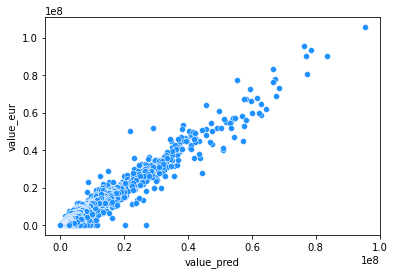

In [17]:
predict_df = data.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)
sns.scatterplot(x="value_pred", y="value_eur", data=predict_df, color="dodgerblue")

In [18]:
predict_df.loc[predict_df["value_eur"] >= predict_df["value_pred"], :].sort_values(by="value_eur", ascending=False).head()

,short_name,nationality,club,age,wage_eur,value_eur,value_pred
2,Neymar Jr,Brazil,Paris Saint-Germain,27,290000,105500000,95282500.0
0,L. Messi,Argentina,FC Barcelona,32,565000,95500000,76230000.0
10,K. Mbappé,France,Paris Saint-Germain,20,155000,93500000,78572500.0
4,E. Hazard,Belgium,Real Madrid,28,470000,90000000,83535000.0
5,K. De Bruyne,Belgium,Manchester City,28,370000,90000000,76830000.0


In [19]:
params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 300, 'min_samples_leaf':9,
          'learning_rate': 0.01, 'loss': 'ls'}

gradient = ensemble.GradientBoostingRegressor(**params)

gradient_boosting = gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)

In [20]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

MAE:  1414746.8716448157
MSE:  9128155262800.377
RMSE:  3021283.7110738833
R2:  0.6892396058434866


In [21]:
y_pred

array([1279113.5513444 , 4287856.51331534, 1450819.67698623, ...,
       1162284.91269027, 1162284.91269027, 1340915.2315592 ])

In [22]:
predict_df = data.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = gradient.predict(X)

# Modelo porteros

In [23]:
def postition_grouping(value):
    delantero = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
    medio = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
    defensa = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    portero = ['gk']
    
    position_dict = {}
    position_dict['delantero'] = delantero
    position_dict['medio'] = medio
    position_dict['defensa'] = defensa
    position_dict['portero'] = portero
    
    value_list = value.replace(' ','').split(',')
    
    for v in value_list:
        for position, items in position_dict.items():
            if v.lower() in items:
                return (position)
    print('Error')

In [24]:
data['position'] = data['player_positions'].apply(lambda x: postition_grouping(x))
data['sofifa_id'] = data['sofifa_id'].apply(lambda x: int(x))
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,delantero
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,delantero
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,delantero
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,delantero


In [25]:
porteros = data.loc[data['position'] == 'portero']

In [26]:
porteros

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,position
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramses Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
14,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,28,1990-11-07,192,82,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
25,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,25,1993-08-17,188,86,Brazil,Manchester City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18231,251365,https://sofifa.com/player/251365/patryk-krolcz...,P. Królczyk,Patryk Królczyk,25,1994-05-10,188,81,Poland,Piast Gliwice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
18239,252151,https://sofifa.com/player/252151/vegard-storsv...,V. Storsve,Vegard Storsve,17,2002-01-25,185,65,Norway,Lillestrøm SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
18251,245408,https://sofifa.com/player/245408/george-sykes-...,G. Sykes-Kenworthy,George Sykes-Kenworthy,19,1999-10-01,182,78,England,Bradford City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero
18259,248182,https://sofifa.com/player/248182/hannes-sveije...,H. Sveijer,Hannes Sveijer,17,2002-04-28,185,71,Sweden,IK Sirius,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,portero


In [27]:
porteros = porteros[['gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',]]


In [28]:
porteros

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
3,87.0,92.0,78.0,89.0,52.0,90.0
6,88.0,85.0,88.0,90.0,45.0,88.0
13,85.0,84.0,85.0,89.0,51.0,90.0
14,90.0,84.0,81.0,92.0,58.0,85.0
25,86.0,82.0,93.0,88.0,63.0,86.0
...,...,...,...,...,...,...
18231,53.0,47.0,55.0,53.0,18.0,48.0
18239,50.0,50.0,48.0,51.0,30.0,49.0
18251,44.0,46.0,45.0,51.0,32.0,48.0
18259,50.0,49.0,48.0,51.0,24.0,47.0


In [29]:
valor_porteros = data.loc[data['position'] == 'portero']

In [30]:
valor_porteros['value_eur']

3        77500000
6        67500000
13       58000000
14       56000000
25       54500000
           ...   
18231       30000
18239       50000
18251       50000
18259       50000
18272       40000
Name: value_eur, Length: 2036, dtype: int64

In [31]:
X = porteros
y = valor_porteros['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7767295284688548

In [33]:
porteros_df = data.loc[data['position'] == 'portero']
porteros_df = porteros_df.loc[:, ["short_name", "nationality", "position", "age", "wage_eur", "value_eur",'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']]
porteros_df["value_pred"] = rf.predict(X)

porteros_df

,short_name,nationality,position,age,wage_eur,value_eur,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,value_pred
3,J. Oblak,Slovenia,portero,26,125000,77500000,87.0,92.0,78.0,89.0,52.0,90.0,62980000.0
6,M. ter Stegen,Germany,portero,27,250000,67500000,88.0,85.0,88.0,90.0,45.0,88.0,56677500.0
13,Alisson,Brazil,portero,26,155000,58000000,85.0,84.0,85.0,89.0,51.0,90.0,54332500.0
14,De Gea,Spain,portero,28,205000,56000000,90.0,84.0,81.0,92.0,58.0,85.0,50457500.0
25,Ederson,Brazil,portero,25,185000,54500000,86.0,82.0,93.0,88.0,63.0,86.0,47110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18231,P. Królczyk,Poland,portero,25,1000,30000,53.0,47.0,55.0,53.0,18.0,48.0,66400.0
18239,V. Storsve,Norway,portero,17,1000,50000,50.0,50.0,48.0,51.0,30.0,49.0,51000.0
18251,G. Sykes-Kenworthy,England,portero,19,1000,50000,44.0,46.0,45.0,51.0,32.0,48.0,42850.0
18259,H. Sveijer,Sweden,portero,17,1000,50000,50.0,49.0,48.0,51.0,24.0,47.0,49300.0


In [34]:
porteros_df.to_csv("output/predict_posiciones/porteros.csv")

# Modelo defensas

In [35]:
defensas = data.loc[data['position'] == 'defensa']

In [36]:
defensas = defensas[['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'weak_foot']]

In [37]:
defensas

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,weak_foot
7,77.0,60.0,70.0,71.0,90.0,86.0,53,52,86,78,...,82,89,47,65,62,89,91,92,85,3
11,71.0,28.0,54.0,67.0,89.0,87.0,30,22,83,71,...,87,88,35,52,33,82,91,90,87,3
16,68.0,46.0,58.0,60.0,90.0,82.0,54,33,83,65,...,91,88,28,50,50,84,94,91,89,3
18,72.0,68.0,75.0,73.0,87.0,85.0,66,63,92,80,...,90,88,67,71,86,84,85,87,90,3
29,56.0,61.0,72.0,68.0,88.0,80.0,57,65,85,83,...,76,89,64,72,69,87,89,88,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18262,56.0,26.0,25.0,30.0,48.0,53.0,23,23,40,27,...,46,50,22,27,39,43,44,52,54,3
18263,56.0,26.0,29.0,48.0,47.0,50.0,33,28,41,26,...,47,52,38,35,30,36,41,49,56,2
18269,70.0,29.0,29.0,35.0,46.0,53.0,28,30,46,31,...,41,49,30,33,39,43,40,48,49,3
18273,57.0,23.0,28.0,33.0,47.0,51.0,21,17,40,35,...,46,48,28,25,39,41,45,50,52,3


In [38]:
valor_defensas = data.loc[data['position'] == 'defensa']

In [39]:
X = defensas
y = valor_defensas['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8622327596871716

In [41]:
defensas_df = data.loc[data['position'] == 'defensa']
defensas_df = defensas_df.loc[:, ["short_name", "nationality", "position", "age", "wage_eur", "value_eur",'pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'weak_foot']]
defensas_df["value_pred"] = rf.predict(X)

defensas_df

,short_name,nationality,position,age,wage_eur,value_eur,pace,shooting,passing,dribbling,...,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,weak_foot,value_pred
7,V. van Dijk,Netherlands,defensa,27,200000,78000000,77.0,60.0,70.0,71.0,...,89,47,65,62,89,91,92,85,3,61537500.0
11,K. Koulibaly,Senegal,defensa,28,150000,67500000,71.0,28.0,54.0,67.0,...,88,35,52,33,82,91,90,87,3,59987500.0
16,G. Chiellini,Italy,defensa,34,215000,24500000,68.0,46.0,58.0,60.0,...,88,28,50,50,84,94,91,89,3,28862500.0
18,Sergio Ramos,Spain,defensa,33,300000,31500000,72.0,68.0,75.0,73.0,...,88,67,71,86,84,85,87,90,3,34997500.0
29,Piqué,Spain,defensa,32,285000,38000000,56.0,61.0,72.0,68.0,...,89,64,72,69,87,89,88,87,3,38375000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18262,S. Callan,Republic of Ireland,defensa,19,1000,50000,56.0,26.0,25.0,30.0,...,50,22,27,39,43,44,52,54,3,50150.0
18263,F. Nevarez,Mexico,defensa,18,1000,50000,56.0,26.0,29.0,48.0,...,52,38,35,30,36,41,49,56,2,51250.0
18269,Huang Jiahui,China PR,defensa,18,1000,40000,70.0,29.0,29.0,35.0,...,49,30,33,39,43,40,48,49,3,48850.0
18273,Shao Shuai,China PR,defensa,22,2000,40000,57.0,23.0,28.0,33.0,...,48,28,25,39,41,45,50,52,3,47900.0


In [42]:
defensas_df.to_csv("output/predict_posiciones/defensas.csv")

# Modelo medios

In [43]:
medios = data.loc[data['position'] == 'medio']

In [44]:
medios = medios[['defending_standing_tackle',
 'dribbling',
 'movement_reactions',
 'movement_reactions',
 'attacking_short_passing',
 'mentality_vision',
 ]]

In [45]:
medios

,defending_standing_tackle,dribbling,movement_reactions,movement_reactions,attacking_short_passing,mentality_vision
5,58,86.0,91,91,92,94
8,76,89.0,89,89,92,91
15,91,81.0,93,93,86,79
21,86,80.0,87,87,89,86
23,48,90.0,84,84,87,87
...,...,...,...,...,...,...
18270,37,44.0,51,51,54,44
18271,39,46.0,53,53,55,49
18275,52,45.0,52,52,53,38
18276,44,47.0,54,54,54,48


In [46]:
valor_medios = data.loc[data['position'] == 'medio']

In [47]:
X = medios
y = valor_medios['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8427168474043251

In [49]:
medios_df = data.loc[data['position'] == 'medio']
medios_df = medios_df.loc[:, ["short_name", "nationality", "position", "age", "wage_eur", "value_eur",'defending_standing_tackle',
 'dribbling',
 'movement_reactions',
 'movement_reactions',
 'attacking_short_passing',
 'mentality_vision']]
medios_df["value_pred"] = rf.predict(X)

medios_df

,short_name,nationality,position,age,wage_eur,value_eur,defending_standing_tackle,dribbling,movement_reactions,movement_reactions,attacking_short_passing,mentality_vision,value_pred
5,K. De Bruyne,Belgium,medio,28,370000,90000000,58,86.0,91,91,92,94,76462500.0
8,L. Modrić,Croatia,medio,33,340000,45000000,76,89.0,89,89,92,91,46017500.0
15,N. Kanté,France,medio,28,235000,66000000,91,81.0,93,93,86,79,55000000.0
21,Sergio Busquets,Spain,medio,30,300000,55000000,86,80.0,87,87,89,86,50595000.0
23,P. Dybala,Argentina,medio,25,215000,76500000,48,90.0,84,84,87,87,65695000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18270,M. Sagaf,England,medio,21,1000,50000,37,44.0,51,51,54,44,50900.0
18271,E. Tweed,Republic of Ireland,medio,20,1000,50000,39,46.0,53,53,55,49,49900.0
18275,Zhang Wei,China PR,medio,19,1000,40000,52,45.0,52,52,53,38,47350.0
18276,Wang Haijian,China PR,medio,18,1000,40000,44,47.0,54,54,54,48,48450.0


In [50]:
medios_df.to_csv("output/predict_posiciones/medios.csv")

In [51]:
y_pred = rf.predict(X_test)

In [52]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

MAE:  917408.2999514446
MSE:  5332524103020.821
RMSE:  2309225.866610025
R2:  0.8427168474043251


# Modelo delanteros

In [53]:
delanteros = data.loc[data['position'] == 'delantero']

In [54]:
delanteros = delanteros[['mentality_positioning',
 'attacking_finishing',
 'movement_reactions',
 'skill_ball_control',
 'power_shot_power',
 ]]

In [55]:
delanteros

,mentality_positioning,attacking_finishing,movement_reactions,skill_ball_control,power_shot_power
0,94,95,95,96,86
1,95,94,96,92,95
2,87,87,92,95,80
4,87,84,90,94,82
9,92,90,92,89,80
...,...,...,...,...,...
18249,44,44,46,52,45
18250,48,53,47,46,46
18254,43,49,45,44,55
18257,49,48,36,46,65


In [56]:
valor_delanteros = data.loc[data['position'] == 'delantero']

In [57]:
X = delanteros
y = valor_delanteros['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8198568878154193

In [59]:
delanteros_df = data.loc[data['position'] == 'delantero']
delanteros_df = delanteros_df.loc[:, ["short_name", "nationality", "position", "age", "wage_eur", "value_eur",'mentality_positioning',
 'attacking_finishing',
 'movement_reactions',
 'skill_ball_control',
 'power_shot_power']]
delanteros_df["value_pred"] = rf.predict(X)

delanteros_df

,short_name,nationality,position,age,wage_eur,value_eur,mentality_positioning,attacking_finishing,movement_reactions,skill_ball_control,power_shot_power,value_pred
0,L. Messi,Argentina,delantero,32,565000,95500000,94,95,95,96,86,73667500.0
1,Cristiano Ronaldo,Portugal,delantero,34,405000,58500000,95,94,96,92,95,64917500.0
2,Neymar Jr,Brazil,delantero,27,290000,105500000,87,87,92,95,80,96277500.0
4,E. Hazard,Belgium,delantero,28,470000,90000000,87,84,90,94,82,89052500.0
9,M. Salah,Egypt,delantero,27,240000,80500000,92,90,92,89,80,74672500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18249,Shan Huanhuan,China PR,delantero,20,2000,70000,44,44,46,52,45,69200.0
18250,R. Roache,Republic of Ireland,delantero,19,1000,60000,48,53,47,46,46,66300.0
18254,E. Jääskeläinen,Finland,delantero,18,1000,60000,43,49,45,44,55,74000.0
18257,Song Min Kyu,Korea Republic,delantero,19,1000,60000,49,48,36,46,65,110350.0


In [60]:
delanteros_df.to_csv("output/predict_posiciones/delanteros.csv")

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

In [ ]:
import sklearn
from sklearn.model_selection import cross_validate
from sklearn import linear_model
import matplotlib.pyplot as plt

### Pruebas

In [ ]:

predicted = cross_validate(rf, delanteros, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predict')
plt.show()

In [ ]:
y_test

### Mergeamos los 4 dataset de las posiciones

In [ ]:
data

In [ ]:
porteros_df

In [ ]:
porteros_df.nlargest(5, columns=['value_pred'])

In [ ]:
df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

In [71]:
porteros = pd.read_csv('output/predict_posiciones/porteros.csv')
defensas = pd.read_csv('output/predict_posiciones/defensas.csv')
medios = pd.read_csv('output/predict_posiciones/medios.csv')
delanteros = pd.read_csv('output/predict_posiciones/delanteros.csv')

### Funciones para sacar alineaciones, con el valor predict y edad

In [72]:
def goalkeeper(numero, valor_jugador,edad):
    gk = porteros.loc[(porteros['value_pred'] <= valor_jugador) & (porteros['age'] <= edad)]
    gk.sort_values(by = 'value_pred', inplace = True, ascending = False)
    gk = gk.nlargest(numero, columns="value_pred")
    return gk

def defenders(numero, valor_jugador,edad):
    defend = defensas.loc[(defensas['value_pred'] <= valor_jugador) & (defensas['age'] <= edad)]
    defend.sort_values(by = 'value_pred', inplace = True, ascending = False)
    defend = defend.nlargest(numero, columns="value_pred")
    return defend

def midfielders(numero, valor_jugador,edad):
    mid = medios.loc[(medios['value_pred'] <= valor_jugador) & (medios['age'] <= edad)]
    mid.sort_values(by = 'value_pred', inplace = True, ascending = False)
    mid = mid.nlargest(numero, columns="value_pred")
    return mid

def forwards(numero, valor_jugador,edad):
    forw = delanteros.loc[(delanteros['value_pred'] <= valor_jugador) & (delanteros['age'] <= edad)]
    forw.sort_values(by = 'value_pred', inplace = True, ascending = False)
    forw = forw.nlargest(numero, columns="value_pred")
    return forw

In [85]:
def alineacion_442(valor_total,edad):
    valor_jugador = valor_total/11
    porteros = goalkeeper(1,valor_jugador,edad).reset_index()
    defensas = defenders(4,valor_jugador,edad).reset_index()
    medios = midfielders(4,valor_jugador,edad).reset_index()
    delanteros = forwards(2,valor_jugador,edad).reset_index()
    pitch = Pitch(pitch_color='grass', line_color='white',stripe=True)
    fig, ax = pitch.draw(figsize=(10, 20))
    annotation = ax.annotate(porteros['short_name'][0], (5, 40), fontsize=20, ha='center')
    annotation = ax.annotate(defensas['short_name'][0], (24, 30), fontsize=20, ha='center')
    annotation = ax.annotate(defensas['short_name'][1], (24, 52), fontsize=20, ha='center')
    annotation = ax.annotate(defensas['short_name'][2], (32, 12), fontsize=20, ha='center')
    annotation = ax.annotate(defensas['short_name'][3], (32, 68), fontsize=20, ha='center')
    annotation = ax.annotate(medios['short_name'][0], (60, 30), fontsize=20, ha='center')
    annotation = ax.annotate(medios['short_name'][1], (60, 52), fontsize=20, ha='center')
    annotation = ax.annotate(medios['short_name'][2], (60, 12), fontsize=20, ha='center')
    annotation = ax.annotate(medios['short_name'][3], (60, 68), fontsize=20, ha='center')
    annotation = ax.annotate(delanteros['short_name'][0], (89, 24), fontsize=20, ha='center')
    annotation = ax.annotate(delanteros['short_name'][1], (89, 60), fontsize=20, ha='center')
    plt.savefig('image.jpg')
    result = pd.concat([porteros,defensas,medios,delanteros]).reset_index()
    result = result[['short_name','nationality','position', 'age','wage_eur','value_eur','value_pred']]
    return result


<ipython-input-72-f9e2f3d2ce85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gk.sort_values(by = 'value_pred', inplace = True, ascending = False)
<ipython-input-72-f9e2f3d2ce85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defend.sort_values(by = 'value_pred', inplace = True, ascending = False)
<ipython-input-72-f9e2f3d2ce85>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid.sort_values(by = 'value_pred', inplace = True, as

,short_name,nationality,position,age,wage_eur,value_eur,value_pred
0,Ederson,Brazil,portero,25,185000,54500000,47110000.0
1,A. Laporte,France,defensa,25,195000,56500000,47627500.0
2,M. Škriniar,Slovakia,defensa,24,89000,52000000,43782500.0
3,C. Lenglet,France,defensa,24,175000,45000000,41327500.0
4,N. Süle,Germany,defensa,23,115000,46500000,37752500.0
5,P. Dybala,Argentina,medio,25,215000,76500000,65695000.0
6,Bruno Fernandes,Portugal,medio,24,24000,49000000,48935000.0
7,F. de Jong,Netherlands,medio,22,195000,52000000,45417500.0
8,Saúl,Spain,medio,24,77000,49500000,41997500.0
9,K. Mbappé,France,delantero,20,155000,93500000,84695000.0


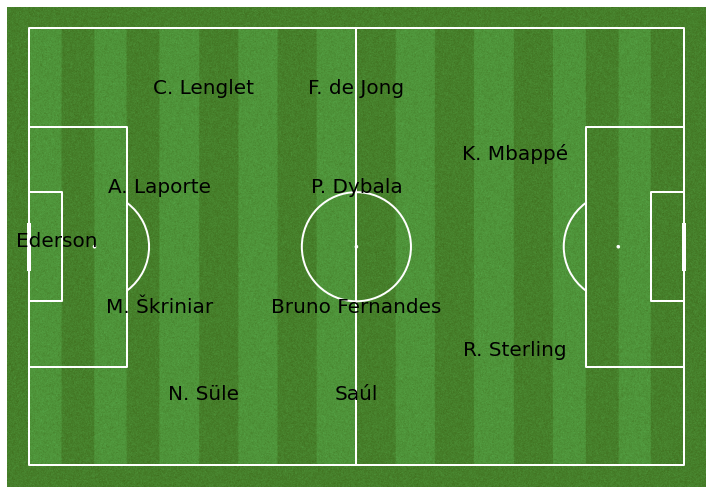

In [86]:
alineacion_442(10000000000, 25)